# Exercises: Variance
By Christopher van Hoecke, Maxwell Margenot, and Delaney Mackenzie

## Lecture Link :
https://www.quantopian.com/lectures/variance

### IMPORTANT NOTE: 
This lecture corresponds to the Variance lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

-----

In [1]:
# Useful Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data:

In [2]:
X = np.random.randint(100, size = 100)

In [3]:
print X

[65 96 66 53 79 86  5 54 93 58 50 15 65 37 19 16 13 52 80 96 53 19 63 46 60
 78 20 95 82  8 46 87 54 77 27 74 21 32 56 33 35 79  3 24 14 63 11 48 32 36
  4 89 95 61 63 97 74 64 89 42 98 93 79 18 52 42 20 35 66 17 73 86  1 35 18
  8 32 91 69 61 82 17 92  6 61 95 68 47 73 52 31 97 88  6 88 64 38  3 38 55]


---

# Exercise 1: 
Using the skills aquired in the lecture series, find the following parameters of the list X above:
- Range
- Mean Absolute Deviation
- Variance and Standard Deviation
- Semivariance and Semideviation
- Target variance (with B = 60)

In [4]:
# Range of X
range_X = np.ptp(X)

## Your code goes here
print 'Range of X: %s' %(range_X)

Range of X: 97


In [5]:
assert range_X == max(X) - min(X)

In [6]:
# Mean Absolute Deviation
# First calculate the value of mu (the mean)

mu = np.mean(X)
MAD = np.sum(np.abs(X - mu)) / len(X)

## Your code goes here
print 'Mean absolute deviation of X:', MAD

Mean absolute deviation of X: 24.8418


In [7]:
# Variance and standard deviation
mu = np.mean(X)
var = np.sum( (X - mu) ** 2) / len(X)
std = np.sqrt(var)

## Your code goes here

print 'Variance of X: \t\t ', var
print 'Standard deviation of X: ', std

Variance of X: 		  838.8691
Standard deviation of X:  28.9632370428


In [8]:
assert var == np.var(X)

In [9]:
assert std == np.std(X)

In [10]:
# Semivariance and semideviation
mu = np.mean(X)
low = np.array([e for e in X if e <= mu])
semivar = np.sum((low - mu) ** 2) / len(low)
semistd = np.sqrt(semivar)
## Your code goes here

print 'Semivariance of X: ', semivar
print 'Semideviation of X:', semistd

Semivariance of X:  934.152814894
Semideviation of X: 30.5639136056


In [11]:
# Target variance
B = 60

low = np.array([e for e in X if e <= B])
semivar_B = np.sum((low - B) ** 2) / len(low)
semistd_B = np.sqrt(semivar)
## Your code goes here

print 'Target semivariance of X: ', semivar_B
print 'Target semideviation of X:', semistd_B

Target semivariance of X:  1190
Target semideviation of X: 30.5639136056


---

# Exercise 2:
Using the skills aquired in the lecture series, find the following parameters of prices for AT&T stock over a year:
- 30 days rolling variance 
- 15 days rolling Standard Deviation

In [12]:
att = get_pricing('T', fields='open_price', start_date='2016-01-01', end_date='2017-01-01')

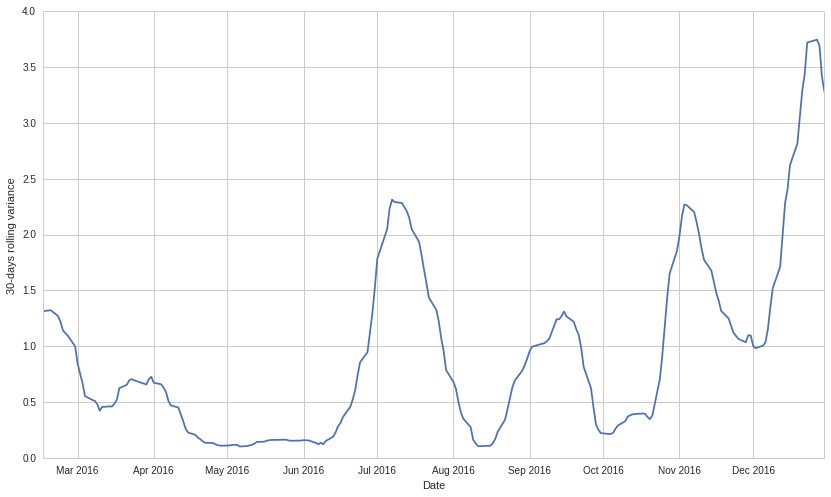

In [13]:
# Rolling mean
## Your code goes here
rolling_var = att.rolling(window=30).var()
plt.plot(rolling_var)
plt.ylabel("30-days rolling variance")
plt.xlabel("Date")
plt.show()

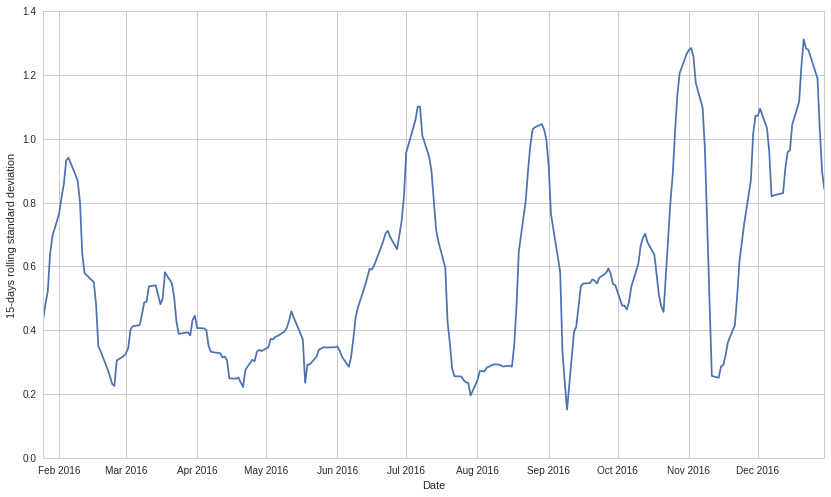

In [14]:
# Rolling standard deviation
## Your code goes here
rolling_std = att.rolling(window=15).std()
plt.plot(rolling_std)
plt.ylabel("15-days rolling standard deviation")
plt.xlabel("Date")
plt.show()

---

# Exercise 3 : 
The portfolio variance is calculated as

$$\text{VAR}_p = \text{VAR}_{s1} (w_1^2) + \text{VAR}_{s2}(w_2^2) + \text{COV}_{S_1, S_2} (2 w_1 w_2)$$

Where $w_1$ and $w_2$ are the weights of $S_1$ and $S_2$.

Find values of $w_1$ and $w_2$ to have a portfolio variance of 50. 

In [15]:
asset1 = get_pricing('AAPL', fields='open_price', start_date='2016-01-01', end_date='2017-01-01')
asset2 = get_pricing('XLF', fields='open_price', start_date='2016-01-01', end_date='2017-01-01')

cov = np.cov(asset1, asset2)[0,1]

w1 = 0.868 ## Your code goes here.
w2 = 1 - w1

#variance calculated here with (1/n) multiplier
#to change this to (1/(n-1)) we need to add ddof = 1 (we do this below)
v1 = np.var(asset1)
v2 = np.var(asset2)

pvariance = (w1**2)*v1+(w2**2)*v2+(2*w1*w2)*cov

print 'Portfolio variance: ', pvariance

Portfolio variance:  49.9960350288


In [16]:
w1 = np.linspace(0,1,11)
pvariance = []
for i in range(11):
    w2 = 1 - w1[i]
    pvariance.append((w1[i]**2)*v1 + (w2**2)*v2 + (2*w1[i]*w2)*cov)

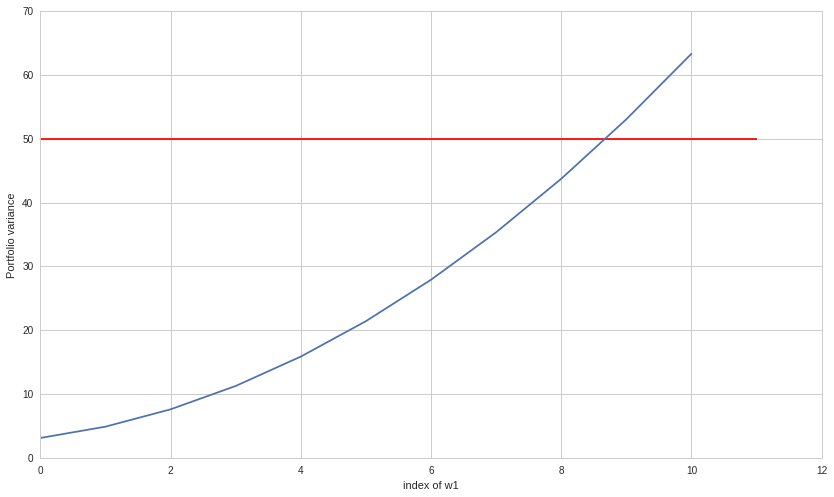

In [17]:
plt.plot(range(11), pvariance)
plt.hlines(y=50, xmin=0, xmax=11, color='red')
plt.ylabel("Portfolio variance")
plt.xlabel("index of w1")
plt.show()

In [18]:
print w1[9]

0.9


But this value is not accurate. We can improve it by using analytical formula:

$$ax^2 + 2bx + c = 0,$$

where

$a = Var{S_{1}} + Var{S_{2}} - 2 \cdot Cov(S_{1}, S_{2})$

$b = Cov(S_{1}, S_{2}) - Var(S_{2})$

$c = Var(S_{2}) - Var(S_{1} + S_{2})$

In [19]:
#function solving quadratic equations in real numbers
def quadratic_equation(a,b,c):
    if (a == 0 and b==0 and c==0):
        return -1
    elif (a == 0 and b==0 and c!=0):
        return 0
    elif (a == 0 and b!=0 and c==0):
        return 0
    elif (a == 0 and b!=0 and c!=0):
        return (-1) * c / b
    elif (a!= 0 and b!=0 and c!=0):
        d = b*b - 4*a*c
        if (d > 0):
            x1 = (-b - np.sqrt(d)) / (2*a)
            x2 = (-b + np.sqrt(d)) / (2*a)
            return x1, x2
        elif (d==0):
            return (-1)*b/(2*a)
        else:
            return 0
    elif (a!=0 and b!=0 and c == 0):
        return 0, (-1)*b/a
    elif (a!=0 and b==0 and c == 0):
        return 0
    elif (a!=0 and b==0 and c!=0):
        return 0

In [20]:
v1 = np.var(asset1, ddof=1)
v2 = np.var(asset2, ddof=1)
v3 = np.cov(asset1, asset2)

a = v1 + v2 - 2*v3[0,1]
b = 2*(v3[0,1]-v2)
pvariance = 50
c = v2 - pvariance

In [21]:
quadratic_equation(a,b,c)

(-1.1397077245099703, 0.86604473296112949)

In [22]:
print quadratic_equation(a,b,c)[-1]

0.866044732961


In [23]:
print "This result is obtained taking into account a multiplier (1/(n-1)) while computing variance"

This result is obtained taking into account a multiplier (1/(n-1)) while computing variance


Without such a multiplier the result will be:

In [24]:
v1 = np.var(asset1)
v2 = np.var(asset2)
v3 = np.cov(asset1, asset2)

a = v1 + v2 - 2*v3[0,1]
b = 2*(v3[0,1]-v2)
pvariance = 50
c = v2 - pvariance

print quadratic_equation(a,b,c)[-1]

0.868041731296


which is the same as that found earlier by brute force.

---

Congratulations on completing the Variance exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*